In [1]:
import time, os
import numpy as np, pandas as pd
import random
import matplotlib.pyplot as plt

In [27]:
# 2163 total constraints
# iterate = [10, 25, 50, 100, 200, 500, 750, 1000, 1500, 2000, 2163]
iterate = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n = 10

g = open("allConstraints.txt", "rt")
constraint = g.readlines()
g.close()

num_files = len(iterate)
runningTime = iterate

means = []
lowerbound = []
upperbound = []

runtime_data = pd.DataFrame(columns=iterate, index=range(1,11))
synth_runtime = pd.DataFrame(columns=iterate, index=range(1, n+1))

### Testing data collection on random entries
- Making sure our constraints aren't duplicated

In [3]:
for num_constraints in iterate:
        arr_constraints = [] # size i in iterate
        arr_runtimes = [] # size n
        
        arr_constraints = random.sample(range(0,2162), num_constraints)
        for i in range(1,11):
#             timeRun = createFile(arr_constraints)
            runtime_data.loc[i,num_constraints] = random.random()
    
runtime_data.to_csv('runtime_data.csv')

In [4]:
runtime_data

,10,20,30,40,50,60,70,80,90,100
1,0.038944,0.721149,0.861612,0.669672,0.31126,0.588453,0.783992,0.369961,0.294728,0.804964
2,0.016243,0.330755,0.517911,0.604756,0.250255,0.963956,0.049625,0.499453,0.538465,0.576358
3,0.029581,0.028896,0.03024,0.887417,0.009588,0.005835,0.557226,0.334736,0.008569,0.236605
4,0.163338,0.740604,0.260394,0.219231,0.931264,0.38889,0.19222,0.96901,0.910854,0.367331
5,0.842134,0.962628,0.052806,0.782032,0.046646,0.107946,0.219733,0.246634,0.461166,0.497254
6,0.829196,0.525232,0.75122,0.537455,0.315849,0.425575,0.360056,0.594405,0.608819,0.249832
7,0.344583,0.166884,0.713087,0.261397,0.8556,0.609307,0.684938,0.91393,0.075071,0.418769
8,0.041022,0.526524,0.591535,0.460219,0.562522,0.387764,0.669666,0.577557,0.382101,0.777281
9,0.627075,0.744251,0.044819,0.704657,0.330091,0.266945,0.305921,0.787849,0.212733,0.779658
10,0.210271,0.710574,0.872103,0.072448,0.982696,0.507343,0.931513,0.481566,0.195226,0.423486


### Updated code, saves to CSV file

In [163]:
def getStates():
    # run 10 times each iterate number to get 5 num summary and plot mean with variance
    for num_constraints in iterate:
        arr_constraints = [] # size i in iterate
        arr_runtimes = [] # size n
        
        arr_constraints = random.sample(range(0,2162), num_constraints)
        for i in range(1,11):
            timeRun = createFile(arr_constraints)
            synth_runtime.loc[i,num_constraints] = timeRun
            arr_runtimes.append(timeRun)
            arr_constraints = []
    
runtime_data.to_csv('synth_runtime_anal.csv')


def createFile(constraints):
    f = open('mnist.smt2', 'w')
    # have this in a file to read from
    h = open("smtGuts.txt", "r")
    for line in h:
        f.write(line)

    for j in constraints:
        f.write(constraint[j])

    f.write("(check-synth)")
    f.close()

    start_time = time.time()
    os.system('../../cvc5/build/bin/cvc5 --lang=sygus2 mnist.smt2')

    runTime = time.time() - start_time
    
    # runs through getStates function to use for mean calculation
    return runTime
        

### the old code

In [163]:
def getStates():
    # run 10 times each iterate number to get 5 num summary and plot mean with variance
    for num_constraints in iterate:
        arr_constraints = [] # size i in iterate
        arr_runtimes = [] # size n
        for j in range(num_constraints*n + 1):
            arr_constraints.append(random.randrange(0, 2162))
    #             if we have enough constraints, then run a cvc5 file with these constrinats
            if ((j % num_constraints) == 0) & (j != 0): 
                    # run cvc5, gather runtime data, store somewhere
                timeRun = createFile(arr_constraints)
                arr_runtimes.append(timeRun)
                arr_constraints = []
        mean = np.mean(arr_runtimes)
        stdev = np.std(arr_runtimes)
        means.append(mean)
        lowerbound.append(mean - stdev)
        upperbound.append(mean + stdev)

def createFile(constraints):
    f = open('mnist.smt2', 'w')
    # have this in a file to read from
    h = open("smtGuts.txt", "r")
    for line in h:
        f.write(line)

    for j in constraints:
        f.write(constraint[j])

    f.write("(check-synth)")
    f.close()

    start_time = time.time()
    os.system('../../cvc5/build/bin/cvc5 --lang=sygus2 mnist.smt2')

    runTime = time.time() - start_time
    
    # runs through getStates function to use for mean calculation
    return runTime
        

### Runs everything

In [164]:
getStates()

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

### Data manipulation, get from CSV file/dataframe of runtimes

In [11]:
means = []
lowerbound = []
upperbound = []

for i in iterate:
    data = runtime_data[i]
    mean = data.mean()
    stdev = data.std()
    lowbound = mean - stdev
    upbound = mean + stdev
    means.append(mean)
    lowerbound.append(lowbound)
    upperbound.append(upbound)

print(f"means: {means}; lowerbound: {lowerbound}; upperbound: {upperbound}")

means: [0.3142386992510954, 0.5457497370079917, 0.46957266336777775, 0.519928291700605, 0.45957708544769016, 0.42520142543557904, 0.4754892719338753, 0.5775102196628485, 0.3687731562742224, 0.5131538024613387]; lowerbound: [-0.018508907809902664, 0.25386305516979335, 0.12599028996485823, 0.2555929197541451, 0.10370336074602776, 0.15402420414711948, 0.184804846212539, 0.3330672124873681, 0.09696017826798675, 0.2986211180170234]; upperbound: [0.6469863063120934, 0.83763641884619, 0.8131550367706972, 0.7842636636470648, 0.8154508101493525, 0.6963786467240386, 0.7661736976552116, 0.8219532268383289, 0.6405861342804581, 0.727686486905654]


### Plot function

In [24]:
def plotRunTime():
    z = np.polyfit(iterate, means, 1)
    p = np.poly1d(z)

    
    plt.rcParams.update({'axes.labelsize' : 14, 'axes.titlesize': 14, 'font.family': 'serif'})
    c = '#ff0000'
    plt.fill_between(iterate, lowerbound, upperbound, color = '#FF9F9F')
    plt.plot(iterate, means, color = c)
    plt.scatter(iterate, means, color = c)
    
#     plt.plot(iterate, p(iterate), linestyle = '--', color = c)
    plt.xlabel('Number of Constraints')
    plt.ylabel('Running Time (seconds)')
    plt.title('CVC5 Runtime on Varied Number of Constraints (MNIST)')
    plt.xticks(iterate, ['10', '20', '30', '40', '50', '60', '70', '80', '90', '100'])
    plt.yticks([0, 0.5, 1.0], ['0.0', '0.5', '1.0'])
    
    plt.margins(x = 0)
    plt.savefig('MNIST')
    plt.show()

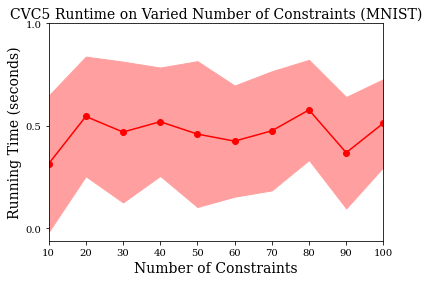

In [25]:
plotRunTime()